In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random

# Conflict = $s^T(I + L)^{-1}s$



# ER, n = 100, p = 0.5

## Replication

In [9]:
ER_G = nx.erdos_renyi_graph(n = 100, p = 0.5, seed = 5)
nodes = nx.nodes(ER_G)
s = np.random.uniform(-1, 1, size=100)
for u, v in ER_G.edges():
    ER_G[u][v]['weight'] = np.random.rand()  

In [10]:
L = nx.laplacian_matrix(ER_G, weight='weight').toarray()

In [14]:
L

array([[ 2.48655188e+01,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00, -8.36514407e-02],
       [ 0.00000000e+00,  1.73222187e+01, -8.50772031e-02, ...,
         0.00000000e+00,  0.00000000e+00, -9.41544936e-01],
       [ 0.00000000e+00, -8.50772031e-02,  3.02949267e+01, ...,
        -2.46947718e-01,  0.00000000e+00, -4.97255191e-01],
       ...,
       [ 0.00000000e+00,  0.00000000e+00, -2.46947718e-01, ...,
         2.42140236e+01, -2.35759505e-02, -2.92754232e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.35759505e-02,  2.59973004e+01, -2.91592959e-01],
       [-8.36514407e-02, -9.41544936e-01, -4.97255191e-01, ...,
        -2.92754232e-01, -2.91592959e-01,  2.54825018e+01]])

In [5]:
def generate_random_pair(L, max_iter):
    for i in range(0, max_iter):
        a, b = random.sample(range(0, len(L)), 2)
        if L[a,b] == 0:
            return (a, b)
    print("cannot find")
def calc_diff_conflict(s, L, num_iter):
    max_iter = 100
    I = np.eye(L.shape[0])                  # Identity matrix
    A = np.linalg.inv(I + L)                # (I + L)^{-1}
    prev_value = s.T @ A @ s  
    output = np.zeros(num_iter)
    for i in range(0, num_iter):
        a, b = generate_random_pair(L, max_iter)
        weight = 1 - np.random.rand()
        L[a,b] = weight
        L[b,a] = weight
        L[a,a] += weight
        L[b,b] += weight
        I = np.eye(L.shape[0])                  # Identity matrix
        A = np.linalg.inv(I + L)                # (I + L)^{-1}
        value = s.T @ A @ s  
        output[i] = value - prev_value
        prev_value = value
    return output

In [7]:
output = calc_diff_conflict(s, L, 50)

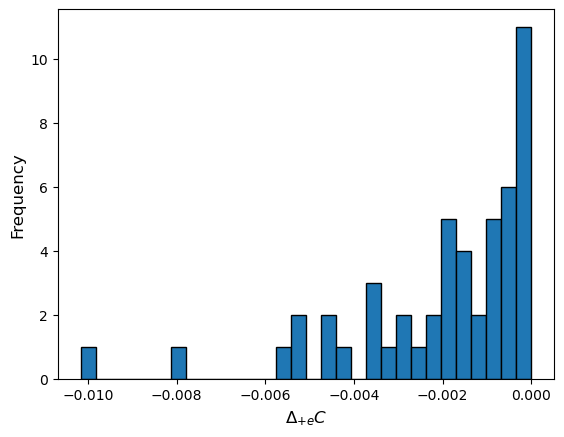

In [8]:
plt.hist(output, bins=30, edgecolor='black')
plt.xlabel(r'$\Delta_{+e}C$',size=12)
plt.ylabel("Frequency",size=12)
plt.show()

## Signed


In [92]:
def calc_diff_conflict_signed(s, L, num_iter):
    max_iter = 100
    I = np.eye(L.shape[0])                  # Identity matrix
    A = np.linalg.inv(I + L)                # (I + L)^{-1}
    prev_value = s.T @ A @ s  
    output = np.zeros(num_iter)
    for i in range(0, num_iter):
        a, b = generate_random_pair(L, max_iter)
        weight = np.random.uniform(-1, 1)
        L[a,b] = weight
        L[b,a] = weight
        L[a,a] += weight
        L[b,b] += weight
        I = np.eye(L.shape[0])                  # Identity matrix
        A = np.linalg.inv(I + L)                # (I + L)^{-1}
        value = s.T @ A @ s  
        output[i] = value - prev_value
        prev_value = value
    return output

In [93]:
ER_G = nx.erdos_renyi_graph(n = 100, p = 0.5, seed = 5)
nodes = nx.nodes(ER_G)
s = np.random.uniform(-1, 1, size=100)
for u, v in ER_G.edges():
    ER_G[u][v]['weight'] =np.random.uniform(-1, 1)

In [94]:
L = nx.laplacian_matrix(ER_G, weight='weight').toarray()

In [95]:
output = calc_diff_conflict_signed(s, L, 50)

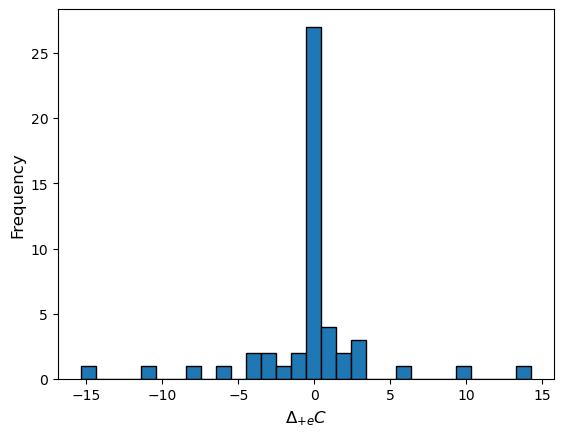

In [96]:
plt.hist(output, bins=30, edgecolor='black')
plt.xlabel(r'$\Delta_{+e}C$',size=12)
plt.ylabel("Frequency",size=12)
plt.show()

# Line Graph n = 100

## Replication

In [62]:
line_G = nx.path_graph(100)
s = np.random.uniform(-1, 1, size=100)
for u, v in line_G.edges():
    line_G[u][v]['weight'] = np.random.rand()  

In [63]:
L = nx.laplacian_matrix(line_G, weight='weight').toarray()

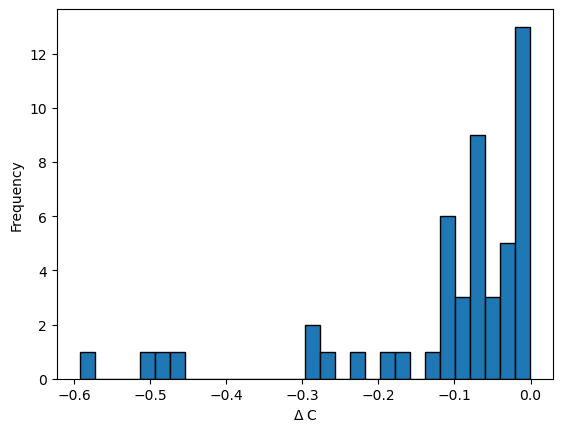

In [64]:
output = calc_diff_conflict(s, L, 50)
plt.hist(output, bins=30, edgecolor='black')
plt.xlabel(r'$\Delta$ C')
plt.ylabel("Frequency")
plt.show()

## Signed

In [65]:
G = nx.path_graph(100)
nodes = nx.nodes(ER_G)
s = np.random.uniform(-1, 1, size=100)
for u, v in G.edges():
    G[u][v]['weight'] =np.random.uniform(-1, 1)

In [66]:
L = nx.laplacian_matrix(G, weight='weight').toarray()

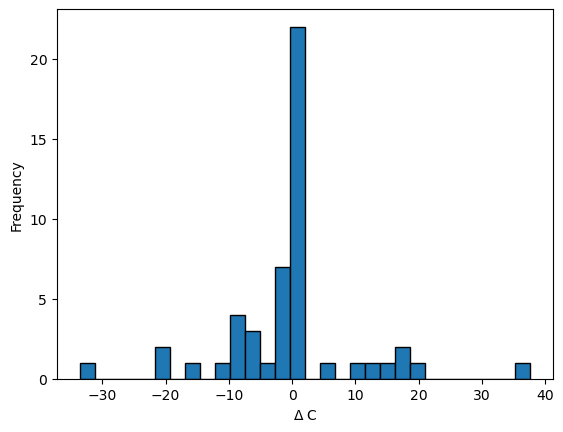

In [67]:
output = calc_diff_conflict_signed(s, L, 50)
plt.hist(output, bins=30, edgecolor='black')
plt.xlabel(r'$\Delta$ C')
plt.ylabel("Frequency")
plt.show()

# Grid Graph

## Replication

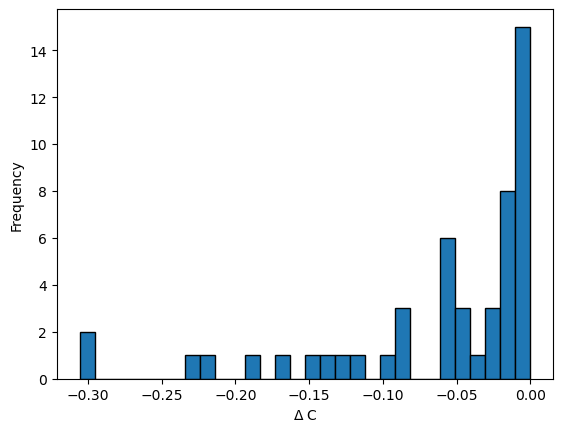

In [71]:
G = nx.grid_2d_graph(5, 20)
s = np.random.uniform(-1, 1, size=100)
for u, v in G.edges():
    G[u][v]['weight'] = np.random.rand() 
L = nx.laplacian_matrix(G, weight='weight').toarray()
output = calc_diff_conflict(s, L, 50)
plt.hist(output, bins=30, edgecolor='black')
plt.xlabel(r'$\Delta$ C')
plt.ylabel("Frequency")
plt.show()

## Signed

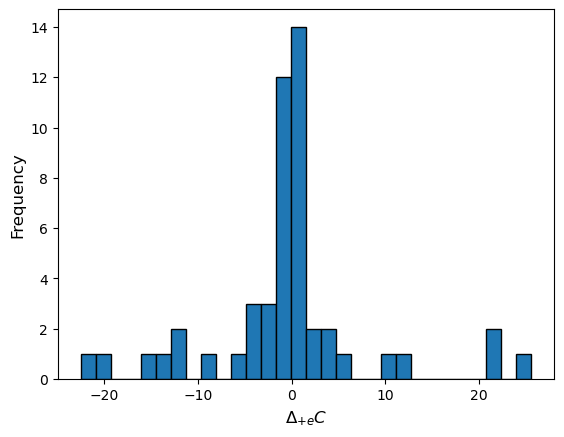

In [82]:
G = nx.grid_2d_graph(5, 20)
s = np.random.uniform(-1, 1, size=100)
for u, v in G.edges():
    G[u][v]['weight'] =np.random.uniform(-1, 1)
L = nx.laplacian_matrix(G, weight='weight').toarray()
output = calc_diff_conflict_signed(s, L, 50)
plt.hist(output, bins=30, edgecolor='black')
plt.xlabel(r'$\Delta_{+e}C$',size=12)
plt.ylabel("Frequency", size=12)
plt.show()

# Karate

## Replication

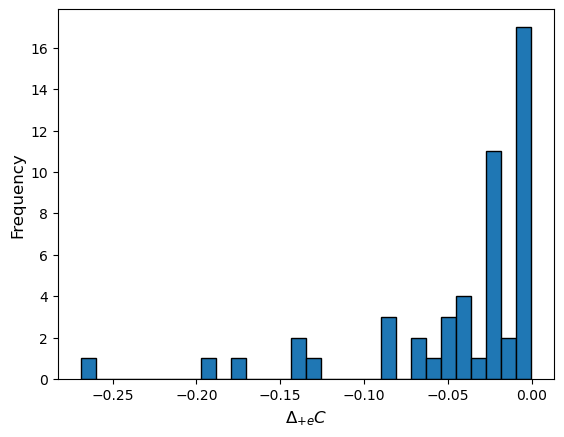

In [83]:
G = nx.karate_club_graph()
s = np.random.uniform(-1, 1, size=len(G.nodes()))
for u, v in G.edges():
    G[u][v]['weight'] = np.random.rand() 
L = nx.laplacian_matrix(G, weight='weight').toarray()
output = calc_diff_conflict(s, L, 50)
plt.hist(output, bins=30, edgecolor='black')
plt.xlabel(r'$\Delta_{+e}C$',size=12)
plt.ylabel("Frequency",size=12)
plt.show()

## Signed

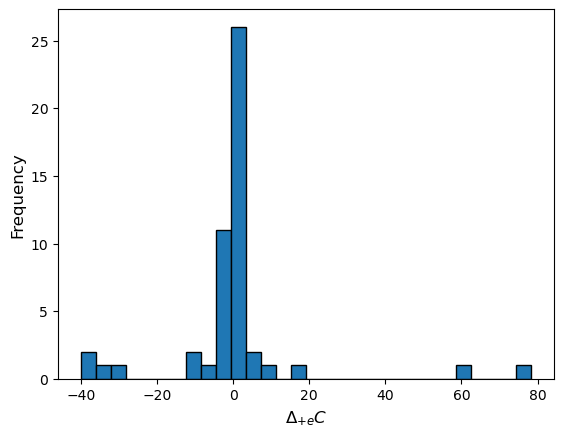

In [84]:
G = nx.karate_club_graph()
s = np.random.uniform(-1, 1, size=len(G.nodes()))
for u, v in G.edges():
    G[u][v]['weight'] =np.random.uniform(-1, 1)
L = nx.laplacian_matrix(G, weight='weight').toarray()
output = calc_diff_conflict_signed(s, L, 50)
plt.hist(output, bins=30, edgecolor='black')
plt.xlabel(r'$\Delta_{+e}C$',size=12)
plt.ylabel("Frequency",size=12)
plt.show()